In [1]:
import dotenv
import pandas as pd

from src.features import build_features

In [2]:
config = dotenv.dotenv_values(dotenv_path=dotenv.find_dotenv())

In [3]:
def check_characters(text_column: pd.Series):
    word_set = set(
        word
        for synonym in text_column
        for word in synonym.split()
    )
    print(f'vocabulary size: {len(word_set)}')
    characters = set([char for word in word_set for char in word])
    extra_characters = [char for char in characters if not char.isalpha()]
    print(f'All characters{sorted(characters)}')
    print(f'Extra characters{sorted(extra_characters)}')

# Raw Synonyms

In [4]:
raw_synonyms = pd.read_csv(config['raw_synonyms_file_name'])
raw_synonyms.shape

(23369, 6)

In [5]:
raw_synonyms.head()

,syn_id,id,name,preferred_name,parent_id,lname
0,23310,5391.0,sacituzumab,NaN,NaN,sacituzumab
1,23311,5391.0,sacituzumab govitecan,1.0,NaN,sacituzumab govitecan
2,23312,5391.0,sacituzumab govitecan-hziy,NaN,NaN,sacituzumab govitecan-hziy
3,23313,5391.0,trodelvy,NaN,NaN,trodelvy
4,23314,5391.0,IMMU-132,NaN,NaN,immu-132


In [6]:
raw_synonyms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23369 entries, 0 to 23368
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   syn_id          23369 non-null  int64  
 1   id              23236 non-null  float64
 2   name            23369 non-null  object 
 3   preferred_name  5025 non-null   float64
 4   parent_id       226 non-null    float64
 5   lname           23369 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


In [7]:
raw_synonyms.describe(include='all')

,syn_id,id,name,preferred_name,parent_id,lname
count,23369.000000,23236.000000,23369,5025.000000,226.000000,23369
unique,NaN,NaN,23369,NaN,NaN,23369
top,NaN,NaN,sacituzumab,NaN,NaN,sacituzumab
freq,NaN,NaN,1,NaN,NaN,1
mean,12120.703453,2705.518506,NaN,0.999602,118.420354,NaN
std,7117.063200,1671.680913,NaN,0.019948,71.019655,NaN
min,3.000000,4.000000,NaN,0.000000,1.000000,NaN
25%,6023.000000,1280.750000,NaN,1.000000,58.250000,NaN
50%,11983.000000,2493.000000,NaN,1.000000,114.500000,NaN
75%,17934.000000,4230.000000,NaN,1.000000,170.250000,NaN


## Check characters

In [8]:
check_characters(raw_synonyms['name'])

vocabulary size: 19501
All characters['&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '>', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '–']
Extra characters['&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '>', '[', ']', '–']


In [9]:
check_characters(raw_synonyms['lname'])

vocabulary size: 19349
All characters['&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '>', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '–']
Extra characters['&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '>', '[', ']', '–']


## Check id and parent_id

In [10]:
raw_synonyms[~raw_synonyms['parent_id'].isna()]

,syn_id,id,name,preferred_name,parent_id,lname
68,23378,5401.0,BMS-626529,NaN,230.0,bms-626529
69,23379,5401.0,BMS 626529,NaN,230.0,bms 626529
310,23720,5448.0,serdexmethylphenidate,1.0,231.0,serdexmethylphenidate
476,23151,5377.0,N4-Hydroxycytidine,NaN,229.0,n4-hydroxycytidine
477,23152,5377.0,Beta-D-N4-hydroxycytidine,NaN,229.0,beta-d-n4-hydroxycytidine
...,...,...,...,...,...,...
22545,24416,NaN,laidlomycin,1.0,236.0,laidlomycin
22546,24417,NaN,BRN 1675244,NaN,236.0,brn 1675244
22547,24418,NaN,EINECS 260-095-1,NaN,236.0,einecs 260-095-1
23071,25105,NaN,carotegrast,1.0,237.0,carotegrast


In [11]:
raw_synonyms[raw_synonyms['name']=='clobetasone butyrate']

,syn_id,id,name,preferred_name,parent_id,lname
7516,4562,3911.0,clobetasone butyrate,1.0,NaN,clobetasone butyrate


Notes: rows with missing `id` will be dropped. 
`tamatinib` gives 0 results in [https://drugcentral.org/?q=tamatinib&approval=](https://drugcentral.org/?q=tamatinib&approval=)

`clobetasone` gives 1 resut: [clobetasone butyrate](https://drugcentral.org/?q=clobetasone&approval=)
 This is not the same, `clobetasone` is not mentioned in the synonyms of [clobetasone butyrate](https://drugcentral.org/drugcard/3911)
 

In [12]:
raw_synonyms[raw_synonyms['id']==217.0]

,syn_id,id,name,preferred_name,parent_id,lname
7017,4046,217.0,anecortave acetate,NaN,NaN,anecortave acetate
16343,13593,217.0,anecortave,1.0,NaN,anecortave
19700,17011,217.0,retaane,NaN,NaN,retaane


In [13]:
raw_synonyms[raw_synonyms['parent_id'] == 225.0]

,syn_id,id,name,preferred_name,parent_id,lname
576,22536,NaN,tamatinib,1.0,225.0,tamatinib
577,22537,NaN,R406,NaN,225.0,r406
578,22538,NaN,R 406,NaN,225.0,r 406


In [14]:
(raw_synonyms['name'] == raw_synonyms['lname']).value_counts()

True     19151
False     4218
Name: count, dtype: int64

In [15]:
raw_synonyms[(raw_synonyms['name'] != raw_synonyms['lname'])]

,syn_id,id,name,preferred_name,parent_id,lname
4,23314,5391.0,IMMU-132,NaN,NaN,immu-132
5,23315,5391.0,TROP-2-SN-38,NaN,NaN,trop-2-sn-38
6,23316,5391.0,hRS7-SN-38-ADC,NaN,NaN,hrs7-sn-38-adc
11,23321,5392.0,NVP-INC280-NX,NaN,NaN,nvp-inc280-nx
12,23322,5392.0,INC280,NaN,NaN,inc280
...,...,...,...,...,...,...
23337,25458,5739.0,ARC1905,NaN,NaN,arc1905
23341,25462,5740.0,REGN3918,NaN,NaN,regn3918
23345,25466,5741.0,PF-06863135,NaN,NaN,pf-06863135
23346,25467,5741.0,RN613,NaN,NaN,rn613


In [16]:
raw_synonyms[(raw_synonyms['name'] != raw_synonyms['lname'])].preferred_name.value_counts()

preferred_name
1.0    86
0.0     1
Name: count, dtype: int64

In [17]:
print(raw_synonyms.shape)
raw_synonyms = raw_synonyms[~raw_synonyms['id'].isna()]
print(raw_synonyms.shape)

(23369, 6)
(23236, 6)


## Check preferred_name

In [18]:
raw_synonyms.preferred_name.value_counts()

preferred_name
1.0    4992
0.0       2
Name: count, dtype: int64

In [19]:
_raw_synonyms = raw_synonyms[raw_synonyms.preferred_name == 0.]
_raw_synonyms

,syn_id,id,name,preferred_name,parent_id,lname
725,22694,5313.0,ALN-TTR02,0.0,NaN,aln-ttr02
16253,13500,1549.0,arginine hydrochloride,0.0,NaN,arginine hydrochloride


In [20]:
ids = set(_raw_synonyms.id)
raw_synonyms[raw_synonyms.id.map(lambda id: id in ids)].sort_values(by='id')

,syn_id,id,name,preferred_name,parent_id,lname
4989,1971,1549.0,l-arginine,NaN,NaN,l-arginine
8238,5319,1549.0,L-Arg,NaN,NaN,l-arg
11131,8279,1549.0,arginine,1.0,NaN,arginine
16253,13500,1549.0,arginine hydrochloride,0.0,NaN,arginine hydrochloride
20852,18180,1549.0,arginine HCl,NaN,NaN,arginine hcl
724,22693,5313.0,patisiran,1.0,NaN,patisiran
725,22694,5313.0,ALN-TTR02,0.0,NaN,aln-ttr02
726,22696,5313.0,ALN-18328,NaN,NaN,aln-18328
22365,24142,5313.0,patisiran sodium,NaN,NaN,patisiran sodium
22366,24143,5313.0,onpattro,NaN,NaN,onpattro


In [21]:
del ids, _raw_synonyms

`preferred_name` equal to 1. indicates preferred name, NaN or 0. not.

`arginine hydrochloride` is in the synonyms of [arginine](https://drugcentral.org/drugcard/1549?q=arginine)
`ALN-TTR02` is in the synonyms of [patisiran](https://drugcentral.org/drugcard/5313?q=patisiran)

In [22]:
check_raw_synonyms = raw_synonyms.groupby('id').agg(count_preferred_name=('preferred_name', 'sum'))
check_raw_synonyms.value_counts()

count_preferred_name
1.0                     4992
0.0                        3
Name: count, dtype: int64

There are 3 synonym groups that don't have a preferred name, they will be deleted.

In [23]:
raw_synonyms = raw_synonyms.set_index(['id']).drop(labels=check_raw_synonyms[check_raw_synonyms.count_preferred_name==0].index)
raw_synonyms = raw_synonyms.reset_index()

In [24]:
del check_raw_synonyms

## Other checks

In [25]:
assert raw_synonyms.syn_id.unique().shape[0] == raw_synonyms.shape[0]
assert raw_synonyms.name.unique().shape[0] == raw_synonyms.shape[0]

In [26]:
# lname is also unique, so if it is not equal to name we should keep it as an extra synonym.
assert raw_synonyms.lname.unique().shape[0] == raw_synonyms.shape[0]

In [27]:
del raw_synonyms

# Cleaned Synonyms

In [28]:
synonyms = pd.read_parquet(config['processed_synonyms_file_name'])

In [29]:
synonyms.head()

,preferred_name,synonyms
id,,
4.0,levobupivacaine,"[chirocain, levobupivacaine, levobupivacaine h..."
5.0,(S)-nicardipine,"[(-)-nicardipine, (s)-nicardipine]"
6.0,(S)-nitrendipine,"[(-)-nitrendipine, (s)-nitrendipine]"
13.0,levdobutamine,"[levdobutamine, levdobutamine lactobionate, ly..."
21.0,aminopterin,"[4-aminofolic acid, aminofolic acid, 4-, amino..."


In [30]:
synonyms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4992 entries, 4.0 to 5743.0
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   preferred_name  4992 non-null   object
 1   synonyms        4992 non-null   object
dtypes: object(2)
memory usage: 117.0+ KB


In [31]:
# synonyms.describe(include='all')

<Axes: ylabel='Frequency'>

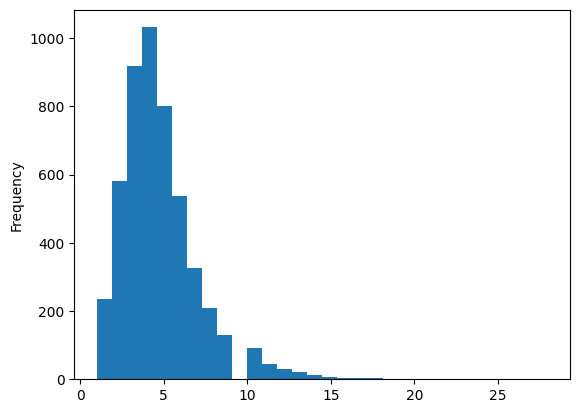

In [32]:
synonyms['synonyms'].map(len).plot(kind='hist', bins=30)

## Check characters

In [33]:
check_characters(synonyms['preferred_name'])

vocabulary size: 4999
All characters['(', ')', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'X', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Extra characters['(', ')', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [34]:
all_synonyms = [el for synms in synonyms['synonyms'] for el in synms]
assert len(all_synonyms) == len(set(all_synonyms))

In [35]:
check_characters(all_synonyms)

vocabulary size: 19275
All characters['&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '>', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '–']
Extra characters['&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '>', '[', ']', '–']


## Check synonym token count

In [36]:
syn_counts_df = pd.DataFrame({
    'synonym': all_synonyms,
    'tokens': [build_features.preprocess_text(synonym) for synonym in all_synonyms],
})
syn_counts_df['token_count'] = syn_counts_df['tokens'].map(len)
syn_counts_df.head(10)

,synonym,tokens,token_count
0,chirocain,[chirocain],1
1,levobupivacaine,[levobupivacaine],1
2,levobupivacaine hcl,"[levobupivacaine, hcl]",2
3,levobupivacaine hydrochloride,"[levobupivacaine, hydrochloride]",2
4,(-)-nicardipine,"[(, -, ), -nicardipine]",4
5,(s)-nicardipine,"[(, s, ), -nicardipine]",4
6,(-)-nitrendipine,"[(, -, ), -nitrendipine]",4
7,(s)-nitrendipine,"[(, s, ), -nitrendipine]",4
8,levdobutamine,[levdobutamine],1
9,levdobutamine lactobionate,"[levdobutamine, lactobionate]",2


In [37]:
syn_counts_df['token_count'].value_counts()

token_count
1     15647
2      6049
3       816
4       460
5       166
6        64
7        10
8         9
9         4
14        1
19        1
Name: count, dtype: int64